<a href="https://colab.research.google.com/github/chirudukuru/cvd-Covid19/blob/main/CVD_MULLinearreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cardiovascularcovid.csv to cardiovascularcovid.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['cardiovascularcovid.csv']))

In [ ]:
df.head(10)

,Case,Age,Smoking,COVID-19,Temperature,Cough,Headache,Sore throat,Oxigen saturation (%),Heartrateminute,Respiratory ratw (breaths minute),Critical status,ICU,Oxigen (%),Frac oxygen (%),Systolic b.p (mmHg),Diastolic b.p (mmHg),Bilateral pulmonary,Length of ICU stay (days),Outcome
0,Patient 1,59,1,1,36.2,1,1,1,95,80,16,1,0,95,21,120,70,0,0,1
1,Patient 2,52,1,1,37.8,0,0,0,99,115,18,3,1,99,24,70,40,1,4,1
2,Patient 3,58,1,0,37.5,1,0,0,94,82,16,1,0,94,21,110,70,1,0,1
3,Patient 4,55,1,1,39.5,1,0,0,96,89,18,2,1,96,21,110,80,1,1,1
4,Patient 5,40,1,1,38.0,1,1,0,98,90,15,2,0,98,21,115,70,0,0,1
5,Patient 6,49,1,1,38.1,1,0,0,93,100,22,3,1,93,35,120,70,1,6,1
6,Patient 7,44,1,0,36.7,0,0,0,98,78,18,1,0,98,21,135,90,0,0,1
7,Patient 8,51,1,1,39.4,1,0,1,96,124,24,3,0,96,21,130,75,1,0,1
8,Patient 9,58,1,1,35.5,1,0,0,95,117,43,3,1,95,60,177,80,0,1,3
9,Patient 10,67,1,1,37.8,1,0,0,90,90,16,2,0,90,21,141,74,0,0,1


In [ ]:
df.describe()

,Age,Smoking,COVID-19,Temperature,Cough,Headache,Sore throat,Oxigen saturation (%),Heartrateminute,Respiratory ratw (breaths minute),Critical status,ICU,Oxigen (%),Frac oxygen (%),Systolic b.p (mmHg),Diastolic b.p (mmHg),Bilateral pulmonary,Length of ICU stay (days),Outcome
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,53.294118,0.666667,0.725490,37.700000,0.803922,0.313725,0.215686,95.098039,89.882353,18.333333,2.019608,0.470588,94.627451,23.647059,130.862745,77.196078,0.509804,2.019608,1.411765
std,9.521122,0.476095,0.450708,0.983056,0.400979,0.468623,0.415390,3.971171,16.376382,5.286461,0.882954,0.504101,4.204573,7.317988,23.031300,12.457961,0.504878,2.686933,0.753033
min,31.000000,0.000000,0.000000,35.500000,0.000000,0.000000,0.000000,79.000000,65.000000,5.000000,1.000000,0.000000,79.000000,21.000000,70.000000,40.000000,0.000000,0.000000,1.000000
25%,49.000000,0.000000,0.000000,37.000000,1.000000,0.000000,0.000000,94.000000,75.500000,16.000000,1.000000,0.000000,93.000000,21.000000,118.500000,70.000000,0.000000,0.000000,1.000000
50%,55.000000,1.000000,1.000000,37.700000,1.000000,0.000000,0.000000,96.000000,90.000000,18.000000,2.000000,0.000000,95.000000,21.000000,130.000000,76.000000,1.000000,0.000000,1.000000
75%,59.000000,1.000000,1.000000,38.350000,1.000000,1.000000,0.000000,97.500000,100.000000,22.000000,3.000000,1.000000,97.000000,21.000000,141.000000,83.500000,1.000000,4.000000,1.500000
max,75.000000,1.000000,1.000000,39.500000,1.000000,1.000000,1.000000,100.000000,124.000000,43.000000,3.000000,1.000000,100.000000,60.000000,196.000000,112.000000,1.000000,9.000000,3.000000


In [ ]:
df.isnull().any()

Case                                 False
Age                                  False
Smoking                              False
COVID-19                             False
Temperature                          False
Cough                                False
Headache                             False
Sore throat                          False
Oxigen saturation (%)                False
Heartrateminute                      False
Respiratory ratw (breaths minute)    False
Critical status                      False
ICU                                  False
Oxigen  (%)                          False
Frac oxygen  (%)                     False
Systolic b.p (mmHg)                  False
Diastolic b.p (mmHg)                 False
Bilateral pulmonary                  False
Length of ICU stay (days)            False
Outcome                              False
dtype: bool

In [ ]:
X = df[['Age', 'COVID-19']].values
Y = df['Heartrateminute'].values

In [ ]:
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


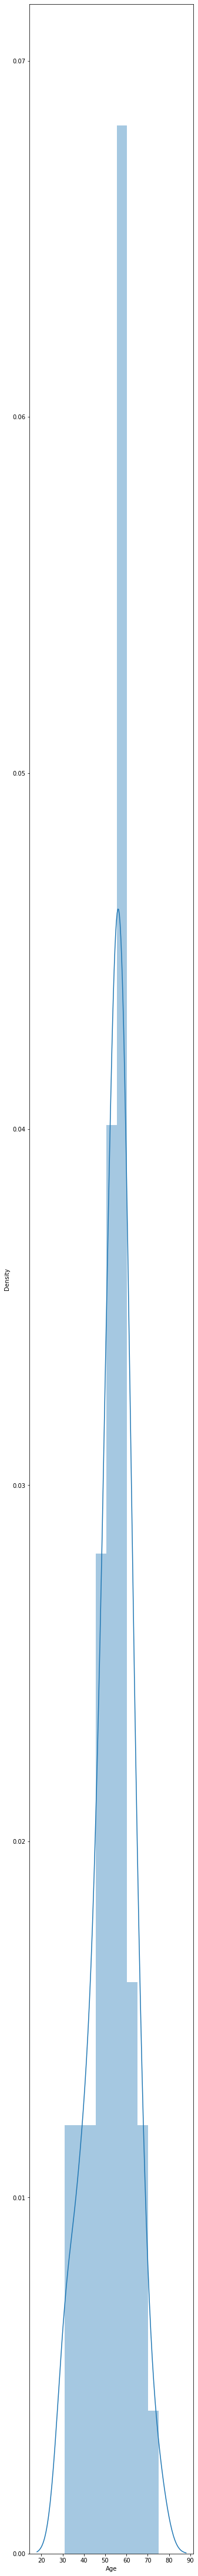

In [ ]:
plt.figure(figsize=(5,80))
plt.tight_layout()
seabornInstance.distplot(df['Age'])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
regressor =LinearRegression()  
regressor.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Intercept: \n', regressor.intercept_)
print('Coefficients: \n', regressor.coef_)

Intercept: 
 77.20365292160086
Coefficients: 
 [-0.08429738 23.66848606]


In [ ]:
Y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df

,Actual,Predicted
0,124,96.151486
1,74,73.073081
2,66,72.820189
3,72,71.977215
4,82,72.314405
5,98,96.235783
6,71,96.067188
7,115,95.898593
8,101,96.067188
9,90,97.500244


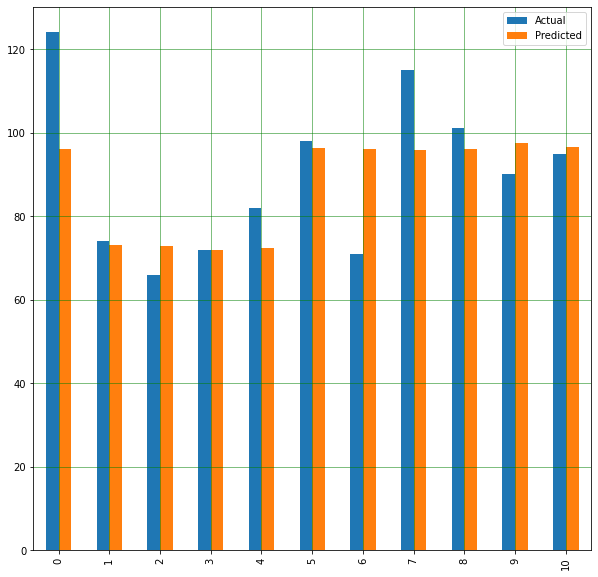

In [ ]:
df = df.head(25)
df.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')